In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [105]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.constants import FIG_DIR
from dogo.results import get_scores_df

In [81]:
plt.rc('font', size=18)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [5]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
    ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("D4RL-HC-M_10000", "D4RL Medium"),
    ("D4RL-HC-ME_10000", "D4RL Medium-Expert"),
    ("D4RL-HC-MR_10000", "D4RL Medium-Replay"),
    ("D4RL-HC-R_10000", "D4RL Random"),
    ("SAC-RT-0.1M-4-P0_10000", "Softlearning 1 - 0.1M Steps"),
    ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
    ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("SAC-RT-2M-4-P0_10000", "Softlearning 1 - 2M Steps"),
    ("SAC-RT-3M-4-P0_10000", "Softlearning 1 - 3M Steps"),
    ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("RAND-1_10000", "Random Policy 1"),
    ("RAND-2_10000", "Random Policy 2"),
    ("RAND-3_10000", "Random Policy 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

# Softlearning Experiment Loading

In [95]:
sac_experiments_01_steps  = ['MP674', 'MP675', 'MP676']
sac_experiments_025_steps = ['MP551', 'MP552', 'MP553']
sac_experiments_05_steps  = ['MP554', 'MP555', 'MP556']
sac_experiments_1_steps   = ['MP557', 'MP558', 'MP559']
sac_experiments_2_steps   = ['MP560', 'MP561', 'MP562']
sac_experiments_3_steps   = ['MP563', 'MP564', 'MP565']

sac_labels = [f'SL: {i}' for i in ['0.1M', '0.25M', '0.5M', '1M', '2M', '3M']]
sac_labels

['SL: 0.1M', 'SL: 0.25M', 'SL: 0.5M', 'SL: 1M', 'SL: 2M', 'SL: 3M']

In [7]:
sac_scores_01_steps_df = get_scores_df(sac_experiments_01_steps, evaluation_datasets)
sac_scores_025_steps_df = get_scores_df(sac_experiments_025_steps, evaluation_datasets)
sac_scores_05_steps_df = get_scores_df(sac_experiments_05_steps, evaluation_datasets)
sac_scores_1_steps_df = get_scores_df(sac_experiments_1_steps, evaluation_datasets)
sac_scores_2_steps_df = get_scores_df(sac_experiments_2_steps, evaluation_datasets)
sac_scores_3_steps_df = get_scores_df(sac_experiments_3_steps, evaluation_datasets)

In [8]:
sac_scores_01_steps_groups = (sac_scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_01_steps_avgs_df = sac_scores_01_steps_groups.mean().reset_index()
sac_scores_01_steps_mins_df = sac_scores_01_steps_groups.min().reset_index()
sac_scores_01_steps_maxs_df = sac_scores_01_steps_groups.max().reset_index()

sac_scores_025_steps_groups = (sac_scores_025_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_025_steps_avgs_df = sac_scores_025_steps_groups.mean().reset_index()
sac_scores_025_steps_mins_df = sac_scores_025_steps_groups.min().reset_index()
sac_scores_025_steps_maxs_df = sac_scores_025_steps_groups.max().reset_index()

sac_scores_05_steps_groups = (sac_scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_05_steps_avgs_df = sac_scores_05_steps_groups.mean().reset_index()
sac_scores_05_steps_mins_df = sac_scores_05_steps_groups.min().reset_index()
sac_scores_05_steps_maxs_df = sac_scores_05_steps_groups.max().reset_index()

sac_scores_1_steps_groups = (sac_scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_1_steps_avgs_df = sac_scores_1_steps_groups.mean().reset_index()
sac_scores_1_steps_mins_df = sac_scores_1_steps_groups.min().reset_index()
sac_scores_1_steps_maxs_df = sac_scores_1_steps_groups.max().reset_index()

sac_scores_2_steps_groups = (sac_scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_2_steps_avgs_df = sac_scores_2_steps_groups.mean().reset_index()
sac_scores_2_steps_mins_df = sac_scores_2_steps_groups.min().reset_index()
sac_scores_2_steps_maxs_df = sac_scores_2_steps_groups.max().reset_index()

sac_scores_3_steps_groups = (sac_scores_3_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
sac_scores_3_steps_avgs_df = sac_scores_3_steps_groups.mean().reset_index()
sac_scores_3_steps_mins_df = sac_scores_3_steps_groups.min().reset_index()
sac_scores_3_steps_maxs_df = sac_scores_3_steps_groups.max().reset_index()

# D3RLPY Experiment Loading

In [96]:
d3rlpy_experiments_01_steps = ['MP449', 'MP450', 'MP451']
d3rlpy_experiments_02_steps = ['MP452', 'MP453', 'MP454']
d3rlpy_experiments_05_steps = ['MP455', 'MP456', 'MP457']
d3rlpy_experiments_1_steps  = ['MP458', 'MP459', 'MP460']
d3rlpy_experiments_2_steps  = ['MP533', 'MP534', 'MP535']

d3rlpy_labels = [f'D3RLPY: {i}' for i in ['0.1M', '0.2M', '0.5M', '1M', '2M']]
d3rlpy_labels

['D3RLPY: 0.1M', 'D3RLPY: 0.2M', 'D3RLPY: 0.5M', 'D3RLPY: 1M', 'D3RLPY: 2M']

In [10]:
d3rlpy_scores_01_steps_df = get_scores_df(d3rlpy_experiments_01_steps, evaluation_datasets)
d3rlpy_scores_02_steps_df = get_scores_df(d3rlpy_experiments_02_steps, evaluation_datasets)
d3rlpy_scores_05_steps_df = get_scores_df(d3rlpy_experiments_05_steps, evaluation_datasets)
d3rlpy_scores_1_steps_df = get_scores_df(d3rlpy_experiments_1_steps, evaluation_datasets)
d3rlpy_scores_2_steps_df = get_scores_df(d3rlpy_experiments_2_steps, evaluation_datasets)

In [11]:
d3rlpy_scores_01_steps_groups = (d3rlpy_scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_01_steps_avgs_df = d3rlpy_scores_01_steps_groups.mean().reset_index()
d3rlpy_scores_01_steps_mins_df = d3rlpy_scores_01_steps_groups.min().reset_index()
d3rlpy_scores_01_steps_maxs_df = d3rlpy_scores_01_steps_groups.max().reset_index()

d3rlpy_scores_02_steps_groups = (d3rlpy_scores_02_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_02_steps_avgs_df = d3rlpy_scores_02_steps_groups.mean().reset_index()
d3rlpy_scores_02_steps_mins_df = d3rlpy_scores_02_steps_groups.min().reset_index()
d3rlpy_scores_02_steps_maxs_df = d3rlpy_scores_02_steps_groups.max().reset_index()

d3rlpy_scores_05_steps_groups = (d3rlpy_scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_05_steps_avgs_df = d3rlpy_scores_05_steps_groups.mean().reset_index()
d3rlpy_scores_05_steps_mins_df = d3rlpy_scores_05_steps_groups.min().reset_index()
d3rlpy_scores_05_steps_maxs_df = d3rlpy_scores_05_steps_groups.max().reset_index()

d3rlpy_scores_1_steps_groups = (d3rlpy_scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_1_steps_avgs_df = d3rlpy_scores_1_steps_groups.mean().reset_index()
d3rlpy_scores_1_steps_mins_df = d3rlpy_scores_1_steps_groups.min().reset_index()
d3rlpy_scores_1_steps_maxs_df = d3rlpy_scores_1_steps_groups.max().reset_index()

d3rlpy_scores_2_steps_groups = (d3rlpy_scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
d3rlpy_scores_2_steps_avgs_df = d3rlpy_scores_2_steps_groups.mean().reset_index()
d3rlpy_scores_2_steps_mins_df = d3rlpy_scores_2_steps_groups.min().reset_index()
d3rlpy_scores_2_steps_maxs_df = d3rlpy_scores_2_steps_groups.max().reset_index()

# MIXED-3

In [12]:
m3_experiments_no_rex = ['MP329', 'MP330', 'MP331']
m3_experiments_rex_01 = ['MP332', 'MP333', 'MP334']
m3_experiments_rex_1  = ['MP335', 'MP336', 'MP337']
m3_experiments_rex_5  = ['MP723', 'MP724', 'MP725']
m3_experiments_rex_10 = ['MP338', 'MP339', 'MP340']

m3_labels = [f'N&SO - {i}' for i in ['No REx', 'REx - $\\beta=0.1$', 'REx - $\\beta=1.0$', 'REx - $\\beta=5.0$', 'REx - $\\beta=10.0$']]
m3_labels

['N&SO - No REx',
 'N&SO - REx - $\\beta=0.1$',
 'N&SO - REx - $\\beta=1.0$',
 'N&SO - REx - $\\beta=5.0$',
 'N&SO - REx - $\\beta=10.0$']

In [13]:
m3_scores_no_rex_df = get_scores_df(m3_experiments_no_rex, evaluation_datasets)
m3_scores_rex_01_df = get_scores_df(m3_experiments_rex_01, evaluation_datasets)
m3_scores_rex_1_df = get_scores_df(m3_experiments_rex_1, evaluation_datasets)
m3_scores_rex_5_df = get_scores_df(m3_experiments_rex_5, evaluation_datasets)
m3_scores_rex_10_df = get_scores_df(m3_experiments_rex_10, evaluation_datasets)

In [14]:
m3_scores_no_rex_groups = (m3_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_no_rex_avgs_df = m3_scores_no_rex_groups.mean().reset_index()
m3_scores_no_rex_mins_df = m3_scores_no_rex_groups.min().reset_index()
m3_scores_no_rex_maxs_df = m3_scores_no_rex_groups.max().reset_index()

m3_scores_rex_01_groups = (m3_scores_rex_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_01_avgs_df = m3_scores_rex_01_groups.mean().reset_index()
m3_scores_rex_01_mins_df = m3_scores_rex_01_groups.min().reset_index()
m3_scores_rex_01_maxs_df = m3_scores_rex_01_groups.max().reset_index()

m3_scores_rex_1_groups = (m3_scores_rex_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_1_avgs_df = m3_scores_rex_1_groups.mean().reset_index()
m3_scores_rex_1_mins_df = m3_scores_rex_1_groups.min().reset_index()
m3_scores_rex_1_maxs_df = m3_scores_rex_1_groups.max().reset_index()

m3_scores_rex_5_groups = (m3_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_5_avgs_df = m3_scores_rex_5_groups.mean().reset_index()
m3_scores_rex_5_mins_df = m3_scores_rex_5_groups.min().reset_index()
m3_scores_rex_5_maxs_df = m3_scores_rex_5_groups.max().reset_index()

m3_scores_rex_10_groups = (m3_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
m3_scores_rex_10_avgs_df = m3_scores_rex_10_groups.mean().reset_index()
m3_scores_rex_10_mins_df = m3_scores_rex_10_groups.min().reset_index()
m3_scores_rex_10_maxs_df = m3_scores_rex_10_groups.max().reset_index()

# MIXED-RT-1

In [15]:
mrt1_experiments_no_rex = ['MP748', 'MP749', 'MP750']
mrt1_experiments_rex_01 = ['MP751', 'MP752', 'MP753']
mrt1_experiments_rex_1  = ['MP754', 'MP755', 'MP756']
mrt1_experiments_rex_5  = ['MP772', 'MP773', 'MP774']
mrt1_experiments_rex_10 = ['MP757', 'MP758', 'MP759']

mrt1_labels = [f'D&O - {i}' for i in ['No REx', 'REx - $\\beta=0.1$', 'REx - $\\beta=1.0$', 'REx - $\\beta=5.0$', 'REx - $\\beta=10.0$']]
mrt1_labels

['D&O - No REx',
 'D&O - REx - $\\beta=0.1$',
 'D&O - REx - $\\beta=1.0$',
 'D&O - REx - $\\beta=5.0$',
 'D&O - REx - $\\beta=10.0$']

In [16]:
mrt1_scores_no_rex_df = get_scores_df(mrt1_experiments_no_rex, evaluation_datasets)
mrt1_scores_rex_01_df = get_scores_df(mrt1_experiments_rex_01, evaluation_datasets)
mrt1_scores_rex_1_df = get_scores_df(mrt1_experiments_rex_1, evaluation_datasets)
mrt1_scores_rex_5_df = get_scores_df(mrt1_experiments_rex_5, evaluation_datasets)
mrt1_scores_rex_10_df = get_scores_df(mrt1_experiments_rex_10, evaluation_datasets)

In [17]:
mrt1_scores_no_rex_groups = (mrt1_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_no_rex_avgs_df = mrt1_scores_no_rex_groups.mean().reset_index()
mrt1_scores_no_rex_mins_df = mrt1_scores_no_rex_groups.min().reset_index()
mrt1_scores_no_rex_maxs_df = mrt1_scores_no_rex_groups.max().reset_index()

mrt1_scores_rex_01_groups = (mrt1_scores_rex_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_01_avgs_df = mrt1_scores_rex_01_groups.mean().reset_index()
mrt1_scores_rex_01_mins_df = mrt1_scores_rex_01_groups.min().reset_index()
mrt1_scores_rex_01_maxs_df = mrt1_scores_rex_01_groups.max().reset_index()

mrt1_scores_rex_1_groups = (mrt1_scores_rex_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_1_avgs_df = mrt1_scores_rex_1_groups.mean().reset_index()
mrt1_scores_rex_1_mins_df = mrt1_scores_rex_1_groups.min().reset_index()
mrt1_scores_rex_1_maxs_df = mrt1_scores_rex_1_groups.max().reset_index()

mrt1_scores_rex_5_groups = (mrt1_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_5_avgs_df = mrt1_scores_rex_5_groups.mean().reset_index()
mrt1_scores_rex_5_mins_df = mrt1_scores_rex_5_groups.min().reset_index()
mrt1_scores_rex_5_maxs_df = mrt1_scores_rex_5_groups.max().reset_index()

mrt1_scores_rex_10_groups = (mrt1_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset']))
mrt1_scores_rex_10_avgs_df = mrt1_scores_rex_10_groups.mean().reset_index()
mrt1_scores_rex_10_mins_df = mrt1_scores_rex_10_groups.min().reset_index()
mrt1_scores_rex_10_maxs_df = mrt1_scores_rex_10_groups.max().reset_index()

# Groupings

In [97]:
initial_experiment_score_avg_dfs = [
    sac_scores_01_steps_avgs_df,
    sac_scores_025_steps_avgs_df,
    sac_scores_05_steps_avgs_df,
    sac_scores_1_steps_avgs_df,
    sac_scores_2_steps_avgs_df,
    sac_scores_3_steps_avgs_df,
    d3rlpy_scores_01_steps_avgs_df,
    d3rlpy_scores_02_steps_avgs_df,
    d3rlpy_scores_05_steps_avgs_df,
    d3rlpy_scores_1_steps_avgs_df,
    d3rlpy_scores_2_steps_avgs_df,
]
initial_experiment_labels = [*sac_labels, *d3rlpy_labels]

In [98]:
experiment_score_avg_dfs = [
    m3_scores_no_rex_avgs_df,
    m3_scores_rex_01_avgs_df,
    m3_scores_rex_1_avgs_df,
    m3_scores_rex_5_avgs_df,
    m3_scores_rex_10_avgs_df,
    mrt1_scores_no_rex_avgs_df,
    mrt1_scores_rex_01_avgs_df,
    mrt1_scores_rex_1_avgs_df,
    mrt1_scores_rex_5_avgs_df,
    mrt1_scores_rex_10_avgs_df,
]
experiment_labels = [*sac_labels, *d3rlpy_labels, *m3_labels, *mrt1_labels]

In [99]:
evaluation_datasets_groups = {
    'D4RL': [
        "D4RL-HC-M_10000",
        "D4RL-HC-ME_10000",
        "D4RL-HC-MR_10000",
        "D4RL-HC-R_10000",
    ],
    'Softlearning': [
        "SAC-RT-0.1M-4-P0_10000", 
        "SAC-RT-0.25M-4-P0_10000", 
        "SAC-RT-0.5M-4-P0_10000", 
        "SAC-RT-1M-4-P0_10000",
        "SAC-RT-2M-4-P0_10000",
        "SAC-RT-3M-4-P0_10000",
        "SAC-RT-0.25M-2-P0_10000", 
        "SAC-RT-0.5M-2-P0_10000", 
        "SAC-RT-1M-2-P0_10000",
        "SAC-RT-2M-2-P0_10000",
        "SAC-RT-3M-2-P0_10000",
        "SAC-RT-0.25M-3-P0_10000", 
        "SAC-RT-0.5M-3-P0_10000", 
        "SAC-RT-1M-3-P0_10000",
        "SAC-RT-2M-3-P0_10000",
        "SAC-RT-3M-3-P0_10000",
    ],
    'D3RLPY': [
        "D3RLPY-RT-0.1M-4-P0_10000",
        "D3RLPY-RT-0.2M-4-P0_10000",
        "D3RLPY-RT-0.5M-4-P0_10000",
        "D3RLPY-RT-1M-4-P0_10000",
        "D3RLPY-RT-2M-4-P0_10000",
        "D3RLPY-RT-0.1M-2-P0_10000",
        "D3RLPY-RT-0.2M-2-P0_10000",
        "D3RLPY-RT-0.5M-2-P0_10000",
        "D3RLPY-RT-1M-2-P0_10000",
        "D3RLPY-RT-2M-2-P0_10000",
        "D3RLPY-RT-0.1M-3-P0_10000",
        "D3RLPY-RT-0.2M-3-P0_10000",
        "D3RLPY-RT-0.5M-3-P0_10000",
        "D3RLPY-RT-1M-3-P0_10000",
        "D3RLPY-RT-2M-3-P0_10000",
    ],
    'Random': [
        "RAND-1_10000",
        "RAND-2_10000",
        "RAND-3_10000",
    ]
}
n_evaluation_datasets = len([item for sublist in [list(i) for i in evaluation_datasets_groups.values()] for item in sublist])

# Error Bar Plots

(0, 1)

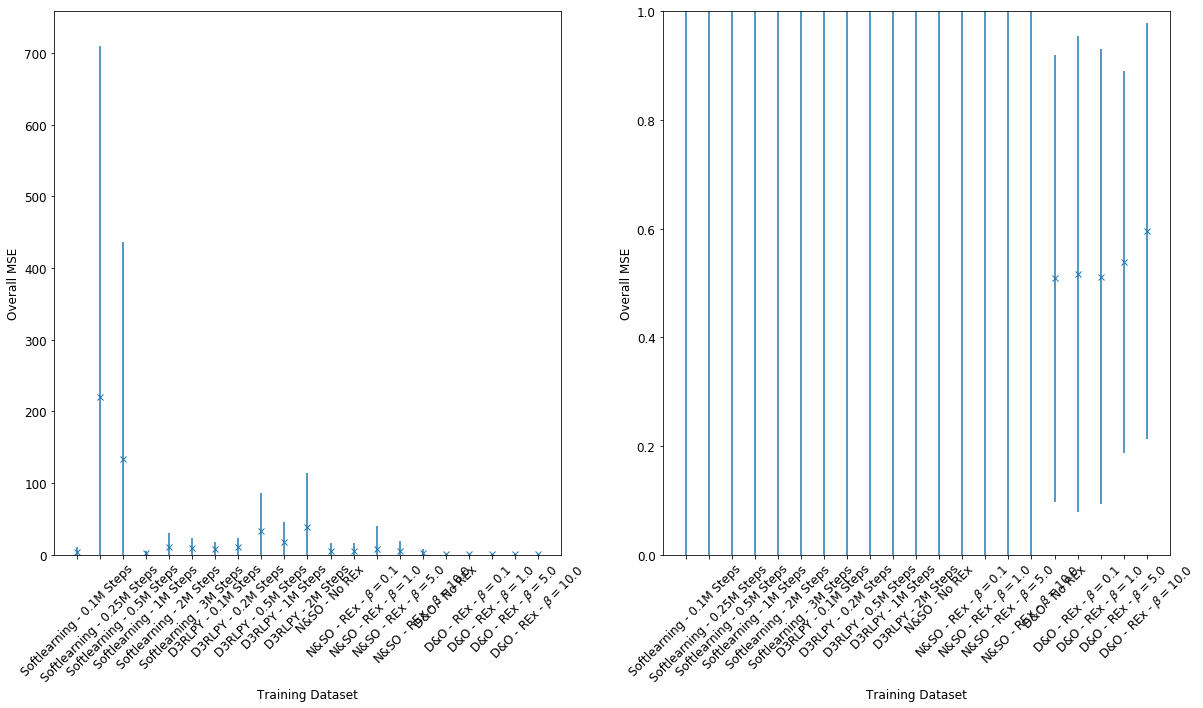

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

metric = 'overall_mse'
scoring_summary_metrics = {}
for results_set, label in zip(experiment_score_avg_dfs, experiment_labels):
    scoring_summary_metrics[label] = {}
    mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(evaluation_datasets), metric]
    scoring_summary_metrics[label]['mean'] = mean_vals.mean()
    scoring_summary_metrics[label]['std'] = mean_vals.std()
scoring_summary_metrics_df = pd.DataFrame().from_dict(scoring_summary_metrics).T

for i in range(2):
    ax[i].errorbar(np.arange(len(experiment_labels)), scoring_summary_metrics_df['mean'].values, scoring_summary_metrics_df['std'].values, ls='', marker='x')
    ax[i].set_xticks(np.arange(len(experiment_labels)))
    ax[i].set_xticklabels(experiment_labels, rotation=45)
    ax[i].set_xlabel('Training Dataset')
    ax[i].set_ylabel('Overall MSE')

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,1)

(0, 1)

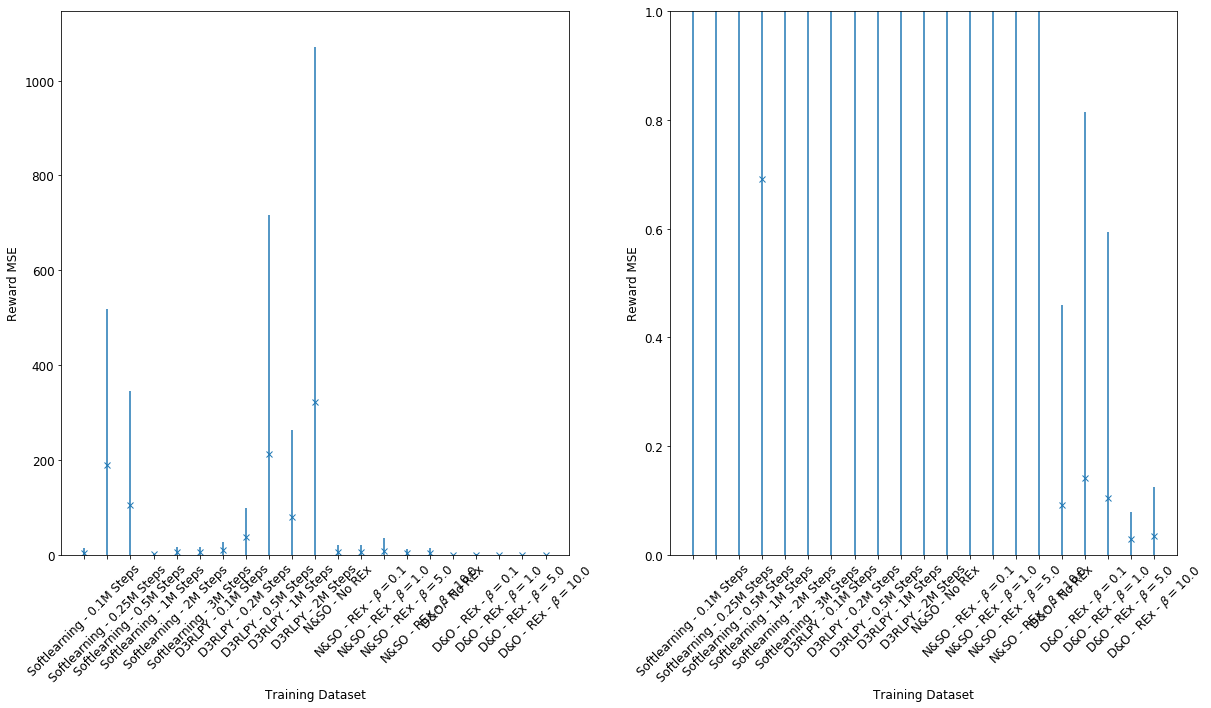

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

metric = 'reward_mse'
scoring_summary_metrics = {}
for results_set, label in zip(experiment_score_avg_dfs, experiment_labels):
    scoring_summary_metrics[label] = {}
    mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(evaluation_datasets), metric]
    scoring_summary_metrics[label]['mean'] = mean_vals.mean()
    scoring_summary_metrics[label]['std'] = mean_vals.std()
scoring_summary_metrics_df = pd.DataFrame().from_dict(scoring_summary_metrics).T

for i in range(2):
    ax[i].errorbar(np.arange(len(experiment_labels)), scoring_summary_metrics_df['mean'].values, scoring_summary_metrics_df['std'].values, ls='', marker='x')
    ax[i].set_xticks(np.arange(len(experiment_labels)))
    ax[i].set_xticklabels(experiment_labels, rotation=45)
    ax[i].set_xlabel('Training Dataset')
    ax[i].set_ylabel('Reward MSE')

ax[0].set_ylim(0,None)
ax[1].set_ylim(0,1)

(-1500, 1000)

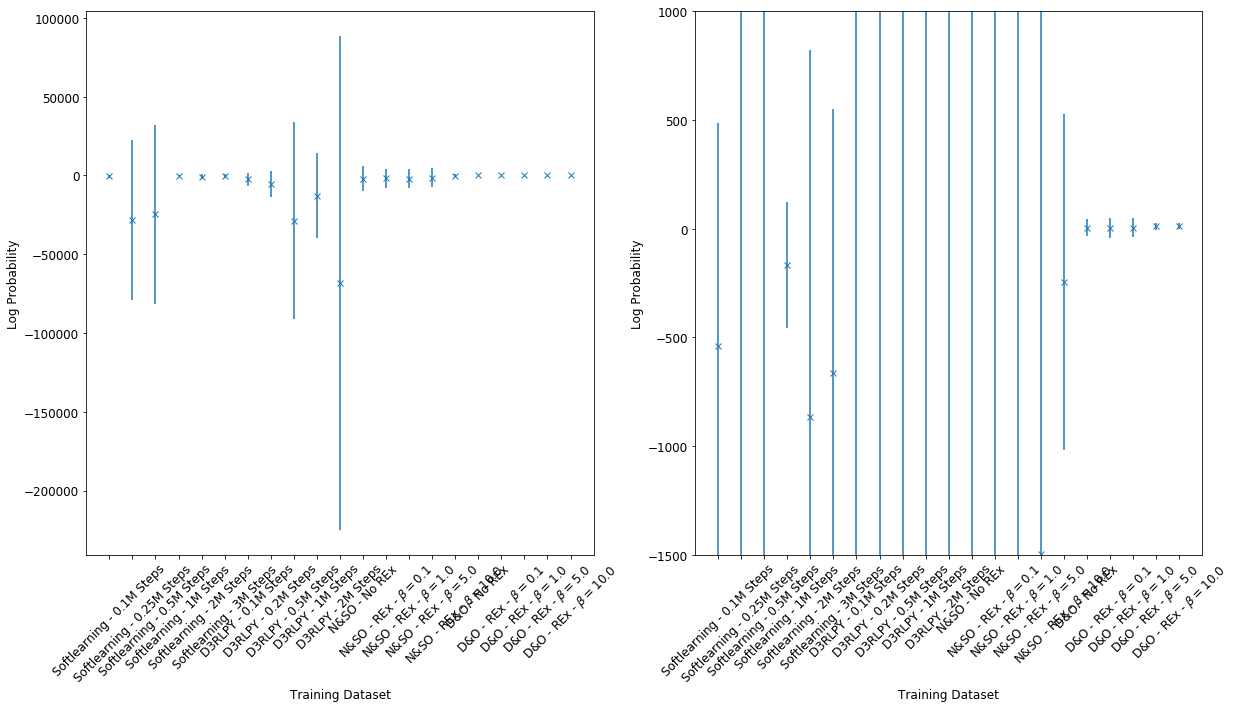

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

metric = 'log_prob'
scoring_summary_metrics = {}
for results_set, label in zip(experiment_score_avg_dfs, experiment_labels):
    scoring_summary_metrics[label] = {}
    mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(evaluation_datasets), metric]
    scoring_summary_metrics[label]['mean'] = mean_vals.mean()
    scoring_summary_metrics[label]['std'] = mean_vals.std(ddof=0)
scoring_summary_metrics_df = pd.DataFrame().from_dict(scoring_summary_metrics).T

for i in range(2):
    ax[i].errorbar(np.arange(len(experiment_labels)), scoring_summary_metrics_df['mean'].values, scoring_summary_metrics_df['std'].values, ls='', marker='x')
    ax[i].set_xticks(np.arange(len(experiment_labels)))
    ax[i].set_xticklabels(experiment_labels, rotation=45)
    ax[i].set_xlabel('Training Dataset')
    ax[i].set_ylabel('Log Probability')

# ax[0].set_ylim(0,None)
ax[1].set_ylim(-1500,1000)

# Breakdown by Dataset - Initial Experiments

In [23]:
# np.testing.assert_equal(scoring_summary_metrics_df['mean'].values, overall_summary_metrics[:,0])
# np.testing.assert_equal(scoring_summary_metrics_df['std'].values, overall_summary_metrics[:,1])

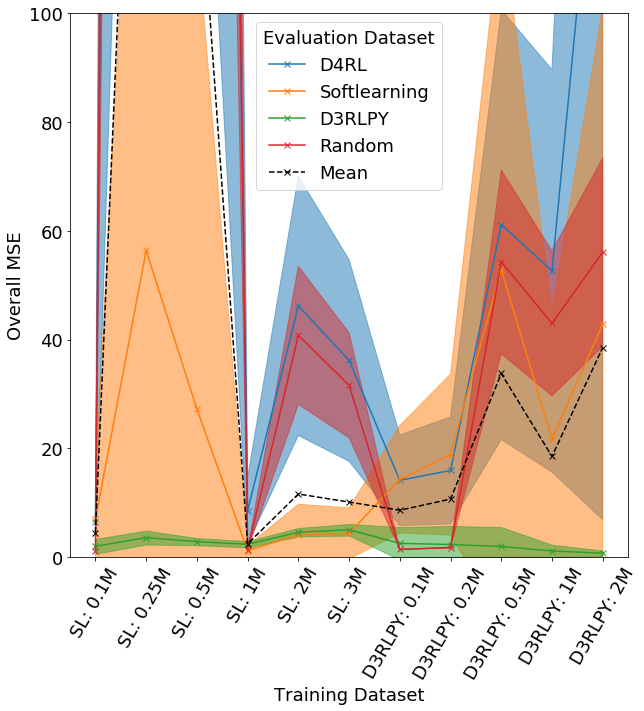

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
overall_summary_metrics = np.zeros((len(initial_experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(initial_experiment_score_avg_dfs), 2))

for j, results_set in enumerate(initial_experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for i, (exp_row, label) in enumerate(zip(dataset_summary_metrics, evaluation_datasets_groups.keys())):
    ax.plot(np.arange(len(initial_experiment_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
    ax.fill_between(np.arange(len(initial_experiment_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)

ax.plot(np.arange(len(initial_experiment_labels)), overall_summary_metrics[:,0], c='k', ls='--', marker='x', label='Mean')

ax.set_xticks(np.arange(len(initial_experiment_labels)))
ax.set_xticklabels(initial_experiment_labels, rotation=60)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0, 100)
ax.legend(title='Evaluation Dataset')

fig.savefig(os.path.join(FIG_DIR, 'ch4', 'pol_exps_ood_overall_mse_comparison.png'), pad_inches=0.2, bbox_inches='tight')

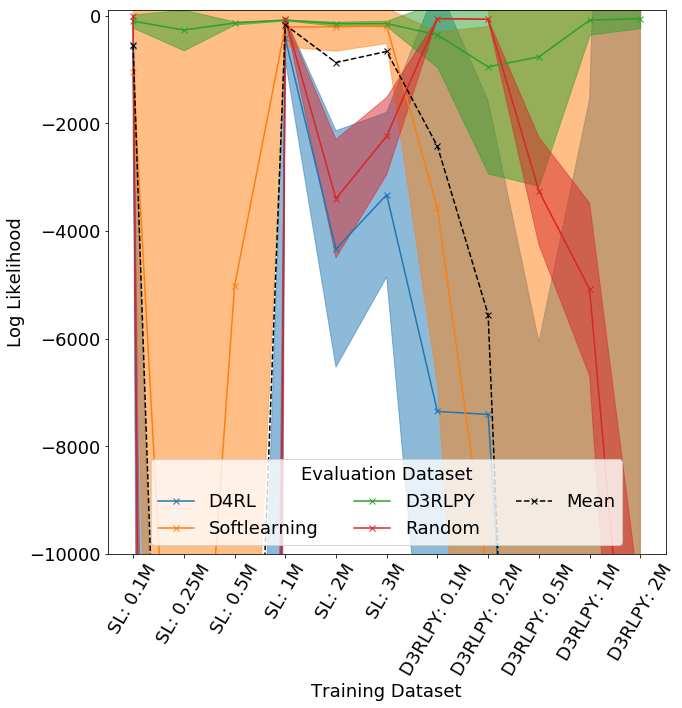

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
overall_summary_metrics = np.zeros((len(initial_experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(initial_experiment_score_avg_dfs), 2))

for j, results_set in enumerate(initial_experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for i, (exp_row, label) in enumerate(zip(dataset_summary_metrics, evaluation_datasets_groups.keys())):
    ax.plot(np.arange(len(initial_experiment_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
    ax.fill_between(np.arange(len(initial_experiment_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)

ax.plot(np.arange(len(initial_experiment_labels)), overall_summary_metrics[:,0], c='k', ls='--', marker='x', label='Mean')

ax.set_xticks(np.arange(len(initial_experiment_labels)))
ax.set_xticklabels(initial_experiment_labels, rotation=60)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-10000, 100)
ax.legend(loc='lower center', title='Evaluation Dataset', ncol=3)

fig.savefig(os.path.join(FIG_DIR, 'ch4', 'pol_exps_ood_log_likelihood_comparison.png'), pad_inches=0.2, bbox_inches='tight')

# Breakdown by Dataset - REx Experiments

(-5, 60)

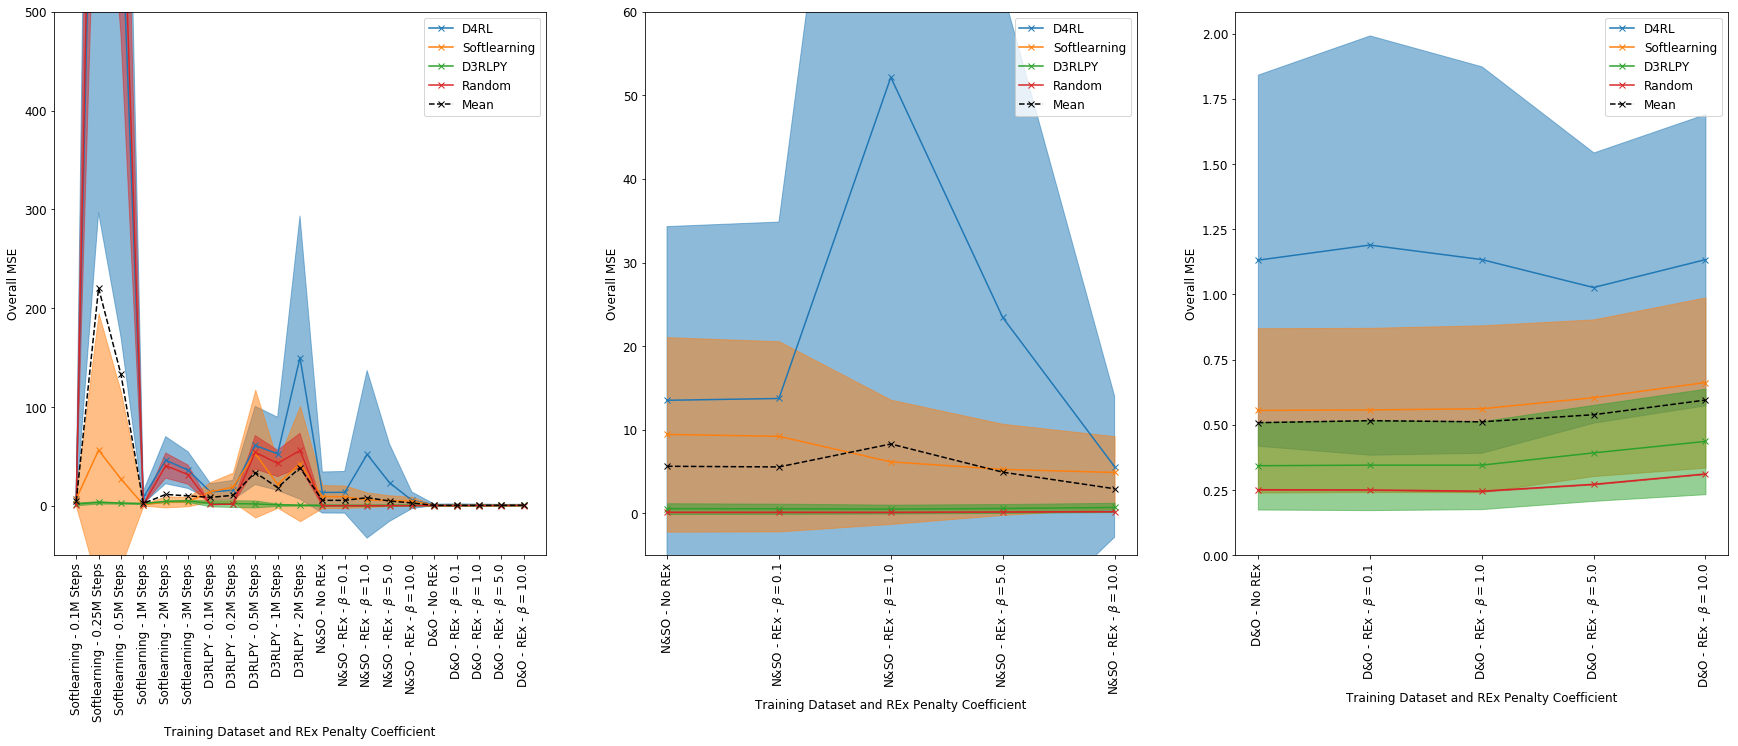

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

metric = 'overall_mse'
overall_summary_metrics = np.zeros((len(experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(experiment_score_avg_dfs), 2))

for j, results_set in enumerate(experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for ax_ind, (s_ind, e_ind) in enumerate([(0,100),(11,16),(16,100)]):
    plot_vals = dataset_summary_metrics[:,s_ind:e_ind,:]
    plot_labels = experiment_labels[s_ind:e_ind]

    for i, (exp_row, label) in enumerate(zip(plot_vals, evaluation_datasets_groups.keys())):
        ax[ax_ind].plot(np.arange(len(plot_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
        ax[ax_ind].fill_between(np.arange(len(plot_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)
    
    ax[ax_ind].plot(np.arange(len(plot_labels)), overall_summary_metrics[s_ind:e_ind,0], c='k', ls='--', marker='x', label='Mean')

    ax[ax_ind].set_xticks(np.arange(len(plot_labels)))
    ax[ax_ind].set_xticklabels(plot_labels, rotation=90)
    ax[ax_ind].set_ylim(0)
    ax[ax_ind].set_xlabel('Training Dataset and REx Penalty Coefficient')
    ax[ax_ind].set_ylabel('Overall MSE')
    ax[ax_ind].legend()

ax[0].set_ylim(-50, 500)
ax[1].set_ylim(-5, 60)

(-0.2, 1)

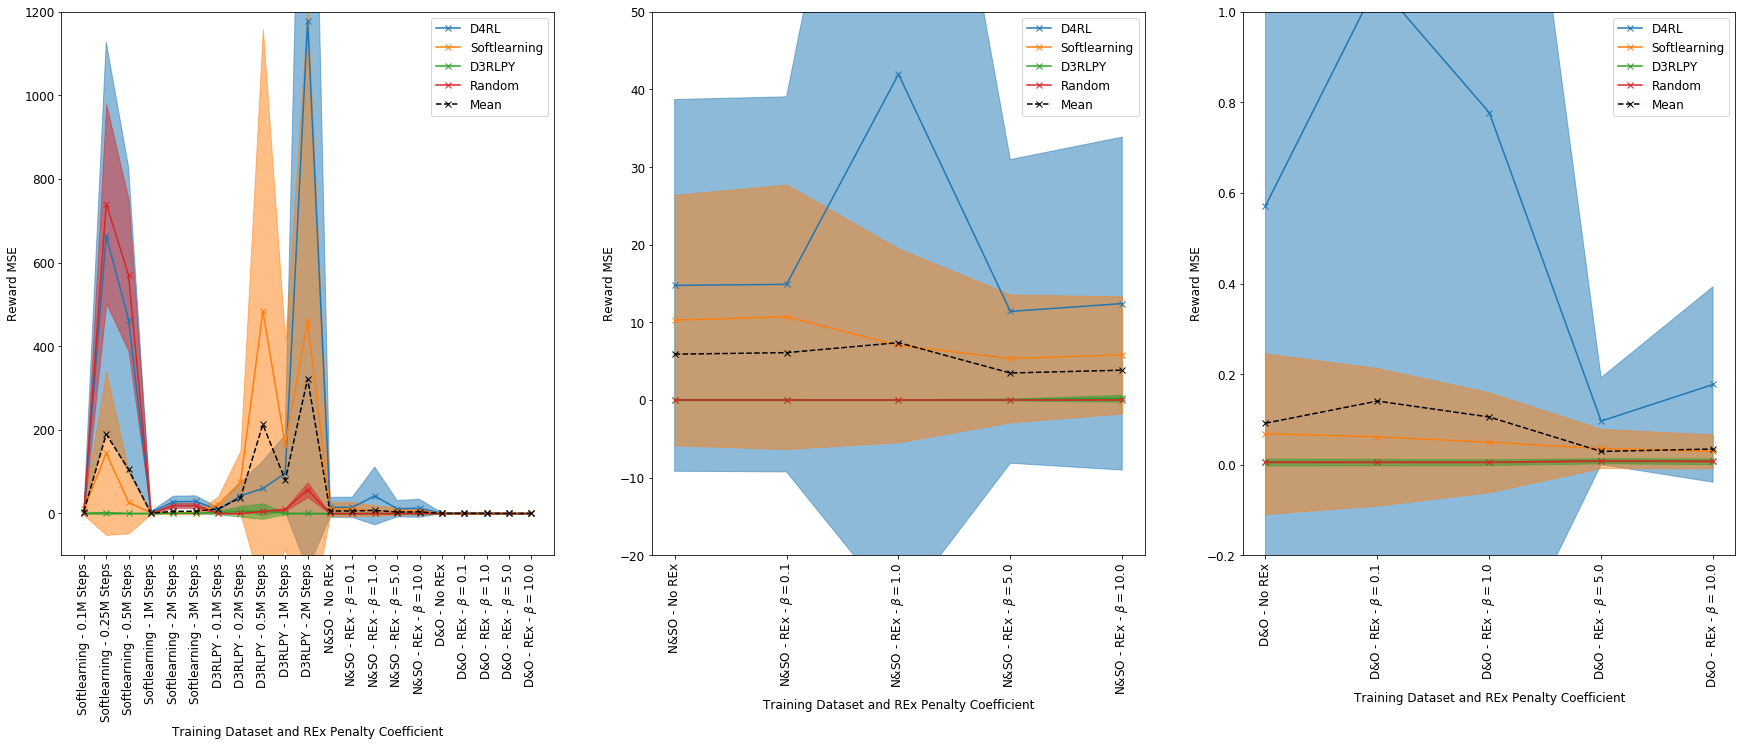

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

metric = 'reward_mse'
overall_summary_metrics = np.zeros((len(experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(experiment_score_avg_dfs), 2))

for j, results_set in enumerate(experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for ax_ind, (s_ind, e_ind) in enumerate([(0,100),(11,16),(16,100)]):
    plot_vals = dataset_summary_metrics[:,s_ind:e_ind,:]
    plot_labels = experiment_labels[s_ind:e_ind]

    for i, (exp_row, label) in enumerate(zip(plot_vals, evaluation_datasets_groups.keys())):
        ax[ax_ind].plot(np.arange(len(plot_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
        ax[ax_ind].fill_between(np.arange(len(plot_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)
    
    ax[ax_ind].plot(np.arange(len(plot_labels)), overall_summary_metrics[s_ind:e_ind,0], c='k', ls='--', marker='x', label='Mean')

    ax[ax_ind].set_xticks(np.arange(len(plot_labels)))
    ax[ax_ind].set_xticklabels(plot_labels, rotation=90)
    ax[ax_ind].set_xlabel('Training Dataset and REx Penalty Coefficient')
    ax[ax_ind].set_ylabel('Reward MSE')
    ax[ax_ind].legend()

ax[0].set_ylim(-100, 1200)
ax[1].set_ylim(-20, 50)
ax[2].set_ylim(-0.2, 1)

(-15000, 4000)

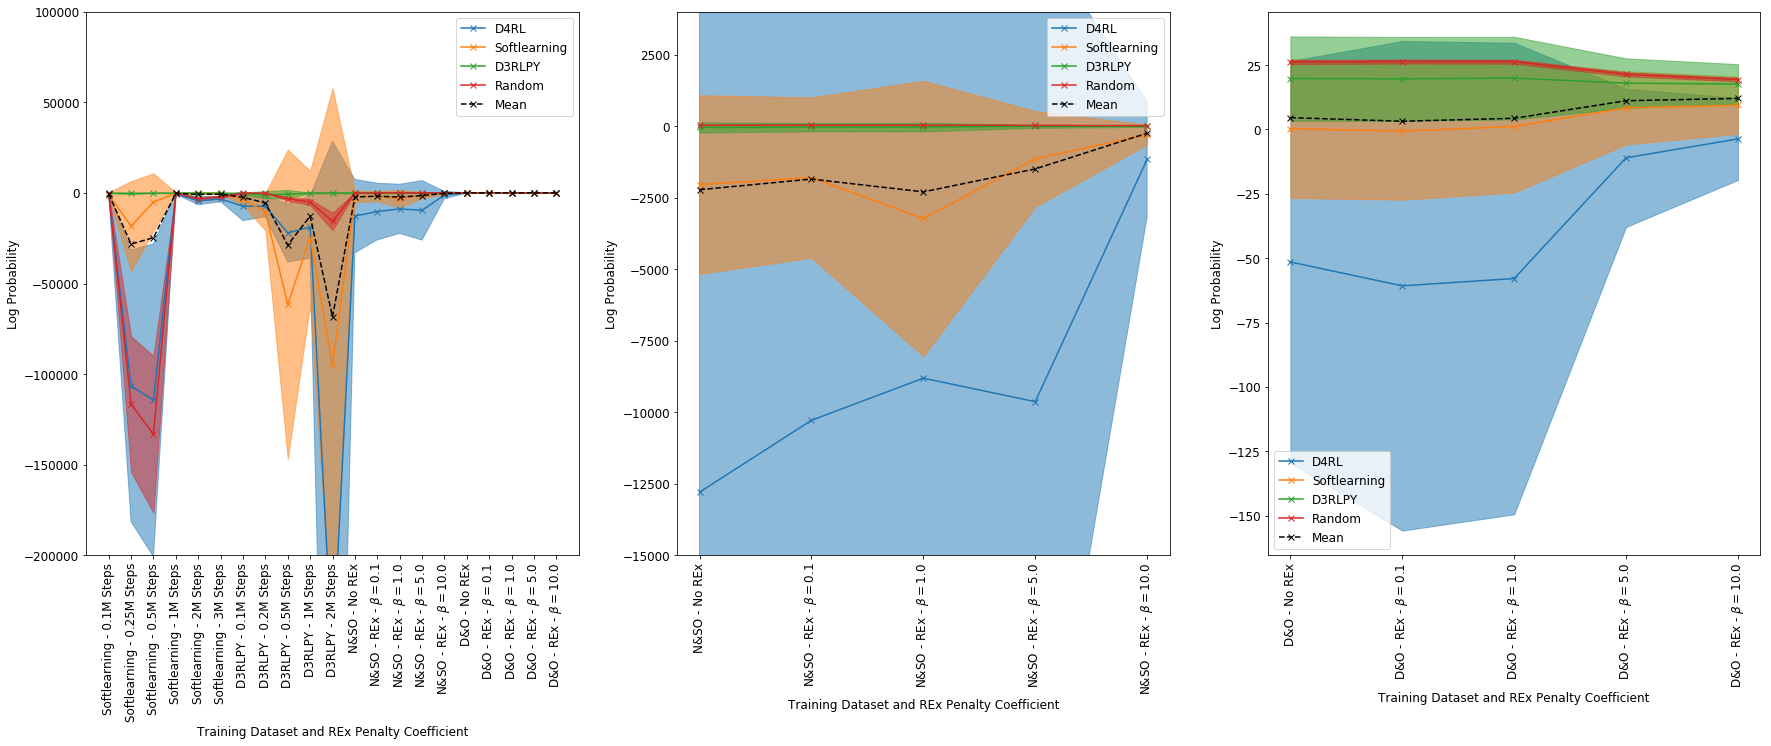

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

metric = 'log_prob'
overall_summary_metrics = np.zeros((len(experiment_score_avg_dfs), 2))
dataset_summary_metrics = np.zeros((len(evaluation_datasets_groups), len(experiment_score_avg_dfs), 2))

for j, results_set in enumerate(experiment_score_avg_dfs):
    
    overall_mean_vals = results_set[metric].values
    overall_summary_metrics[j,0], overall_summary_metrics[j,1] = overall_mean_vals.mean(), overall_mean_vals.std()

    for i, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
        
        dataset_mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric].values
        dataset_summary_metrics[i,j,0] = dataset_mean_vals.mean()
        dataset_summary_metrics[i,j,1] = dataset_mean_vals.std()

for ax_ind, (s_ind, e_ind) in enumerate([(0,100),(11,16),(16,100)]):
    plot_vals = dataset_summary_metrics[:,s_ind:e_ind,:]
    plot_labels = experiment_labels[s_ind:e_ind]

    for i, (exp_row, label) in enumerate(zip(plot_vals, evaluation_datasets_groups.keys())):
        ax[ax_ind].plot(np.arange(len(plot_labels)), exp_row[:,0], c=cols[i], marker='x', label=label)
        ax[ax_ind].fill_between(np.arange(len(plot_labels)), exp_row[:,0]-exp_row[:,1], exp_row[:,0]+exp_row[:,1], color=cols[i], alpha=0.5)
    
    ax[ax_ind].plot(np.arange(len(plot_labels)), overall_summary_metrics[s_ind:e_ind,0], c='k', ls='--', marker='x', label='Mean')

    ax[ax_ind].set_xticks(np.arange(len(plot_labels)))
    ax[ax_ind].set_xticklabels(plot_labels, rotation=90)
    ax[ax_ind].set_xlabel('Training Dataset and REx Penalty Coefficient')
    ax[ax_ind].set_ylabel('Log Probability')
    ax[ax_ind].legend()

ax[0].set_ylim(-200000, 100000)
ax[1].set_ylim(-15000, 4000)

# Heatmaps

In [27]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap_min=-1000
# cmap_max=50
# metric = 'log_prob'
# scoring_summary_metrics = np.zeros((len(experiment_score_avg_dfs), len(evaluation_datasets_groups), 2))
# for i, (results_set, label) in enumerate(zip(experiment_score_avg_dfs, experiment_labels)):
#     for j, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
#         mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric]
#         scoring_summary_metrics[i,j,0] = mean_vals.mean()
#         scoring_summary_metrics[i,j,1] = mean_vals.std()

# mat = ax.matshow(scoring_summary_metrics[:,:,0])
# mat.set_clim(vmin=cmap_min, vmax=cmap_max)
# ax.set_xticks(range(len(evaluation_datasets_groups)))
# ax.set_yticks(range(len(experiment_score_avg_dfs)))
# ax.set_xticklabels(evaluation_datasets_groups.keys(), rotation=45)
# ax.set_yticklabels(experiment_labels)
# ax.set_xlabel('Evaluation Dataset Group')
# ax.set_ylabel('Policy Training Dataset')

# for (j,k), z in np.ndenumerate(scoring_summary_metrics[:,:,0]):
#     if z != 0:
#         ax.text(k, j, '{:.0f}\n±{:.0f}'.format(scoring_summary_metrics[j,k,0], scoring_summary_metrics[j,k,1]), ha="center", va="center", color='w' if scoring_summary_metrics[j,k,0] < -750 else 'k')


In [28]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# cmap_min=-1
# cmap_max=100
# metric = 'overall_mse'
# scoring_summary_metrics = np.zeros((len(experiment_score_avg_dfs), len(evaluation_datasets_groups), 2))
# for i, (results_set, label) in enumerate(zip(experiment_score_avg_dfs, experiment_labels)):
#     for j, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
#         mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric]
#         scoring_summary_metrics[i,j,0] = mean_vals.mean()
#         scoring_summary_metrics[i,j,1] = mean_vals.std()

# mat = ax.matshow(scoring_summary_metrics[:,:,0])
# mat.set_clim(vmin=cmap_min, vmax=cmap_max)
# ax.set_xticks(range(len(evaluation_datasets_groups)))
# ax.set_yticks(range(len(experiment_score_avg_dfs)))
# ax.set_xticklabels(evaluation_datasets_groups.keys(), rotation=45)
# ax.set_yticklabels(experiment_labels)
# ax.set_xlabel('Evaluation Dataset Group')
# ax.set_ylabel('Policy Training Dataset')

# for (j,k), z in np.ndenumerate(scoring_summary_metrics[:,:,0]):
#     if z != 0:
#         ax.text(k, j, '{:.2f}\n±{:.2f}'.format(scoring_summary_metrics[j,k,0], scoring_summary_metrics[j,k,1]), ha="center", va="center", color='w' if scoring_summary_metrics[j,k,0] < 30 else 'k')


In [29]:
# fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# cmap_min=-1
# cmap_max=100
# metric = 'reward_mse'
# scoring_summary_metrics = np.zeros((len(experiment_score_avg_dfs), len(evaluation_datasets_groups), 2))
# for i, (results_set, label) in enumerate(zip(experiment_score_avg_dfs, experiment_labels)):
#     for j, (eval_dataset_label, eval_dataset_group) in enumerate(evaluation_datasets_groups.items()):
#         mean_vals = results_set.loc[results_set['evaluation_dataset'].isin(eval_dataset_group), metric]
#         scoring_summary_metrics[i,j,0] = mean_vals.mean()
#         scoring_summary_metrics[i,j,1] = mean_vals.std()

# mat = ax.matshow(scoring_summary_metrics[:,:,0])
# mat.set_clim(vmin=cmap_min, vmax=cmap_max)
# ax.set_xticks(range(len(evaluation_datasets_groups)))
# ax.set_yticks(range(len(experiment_score_avg_dfs)))
# ax.set_xticklabels(evaluation_datasets_groups.keys(), rotation=45)
# ax.set_yticklabels(experiment_labels)
# ax.set_xlabel('Evaluation Dataset Group')
# ax.set_ylabel('Policy Training Dataset')

# for (j,k), z in np.ndenumerate(scoring_summary_metrics[:,:,0]):
#     if z != 0:
#         ax.text(k, j, '{:.3f}\n±{:.3f}'.format(scoring_summary_metrics[j,k,0], scoring_summary_metrics[j,k,1]), ha="center", va="center", color='w' if scoring_summary_metrics[j,k,0] < 30 else 'k')
